### Задание

При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма дифференциальной эволюции:
strategy, maxiter, popsize, tol, mutation, recombination и updating.

Постройте графики количества итераций оптимизации функции ackley от значения параметра.



In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import pandas as pd
from scipy.optimize import differential_evolution

In [2]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-5, 5), (-5, 5)]
result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2973
     nit: 96
 success: True
       x: array([0., 0.])

In [3]:
result.x, result.fun

(array([0., 0.]), 4.440892098500626e-16)

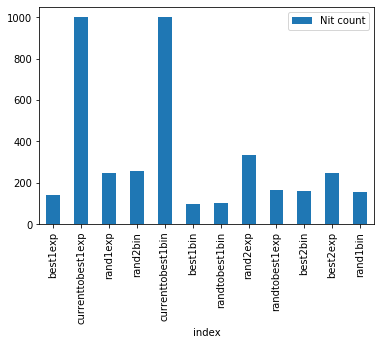

In [4]:
# параметр strategy
strategy_dict = {'best1bin', 'best1exp', 'rand1exp', 'randtobest1exp', 'currenttobest1exp', 
            'best2exp', 'rand2exp', 'randtobest1bin', 'currenttobest1bin', 'best2bin', 'rand2bin', 'rand1bin'}

strategy_nit={}
for strategy in strategy_dict:
    result = differential_evolution(ackley, bounds, seed=42, strategy=strategy)
    strategy_nit[strategy]= result.nit
    
df = pd.DataFrame.from_dict(strategy_nit, orient='index', columns=['Nit count']).reset_index()    
df.plot(kind='bar',x='index',y='Nit count') 

In [5]:
# параметр maxiter   - параметр максимального числа итераций, при изменении параметра график будет иметь вид x=y
differential_evolution(ackley, bounds, seed=42, maxiter=2)

     fun: 1.7143417796461335e-08
     jac: array([0.15533779, 0.4587843 ])
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 291
     nit: 2
 success: False
       x: array([-4.65204091e-09, -3.88530663e-09])

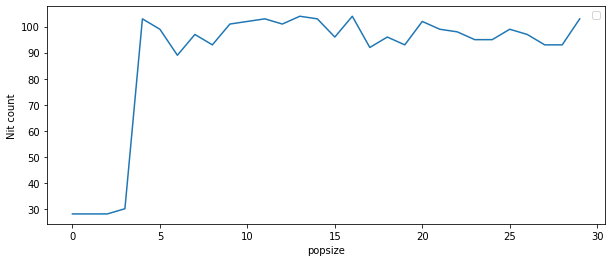

In [6]:
# параметр popsize

popsize_nit={}
for i in range(30):
    result = differential_evolution(ackley, bounds, seed=42, popsize=i)
    popsize_nit[i]= result.nit
    
plt.figure(figsize=[10,4])    
df = pd.DataFrame.from_dict(popsize_nit, orient='index', columns=['Nit count']).reset_index()    
plt.legend('Nit count for parameter in differential_evolution')
plt.xlabel('popsize')
plt.ylabel('Nit count')
plt.plot('index', 'Nit count',data=df)

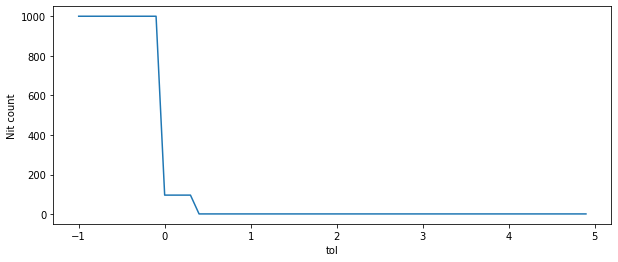

In [7]:
# параметр tol
tol_nit = {}
for i in np.arange(-1, 5, 0.1):
    i = round(i,1)
    result = differential_evolution(ackley, bounds, seed=42, tol=i)
    tol_nit[i] = result.nit
    
plt.figure(figsize=[10,4])    
df = pd.DataFrame.from_dict(tol_nit, orient='index', columns=['Nit count']).reset_index()    
plt.xlabel('tol')
plt.ylabel('Nit count')
plt.plot('index', 'Nit count', data=df)    

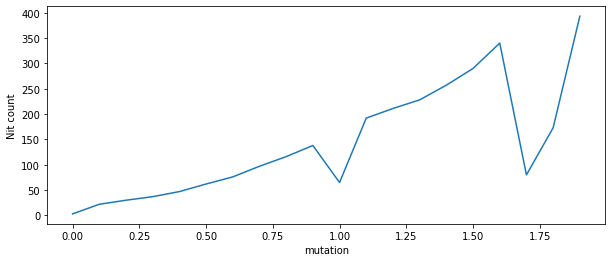

In [8]:
# параметр mutation

mutation_nit = {}
for i in np.arange(0, 2, 0.1):
    i = round(i,1)
    result = differential_evolution(ackley, bounds, seed=42, mutation=i)
    mutation_nit[i] = result.nit
    
plt.figure(figsize=[10,4])    
df = pd.DataFrame.from_dict(mutation_nit, orient='index', columns=['Nit count']).reset_index()    
plt.xlabel('mutation')
plt.ylabel('Nit count')
plt.plot('index', 'Nit count', data=df)    

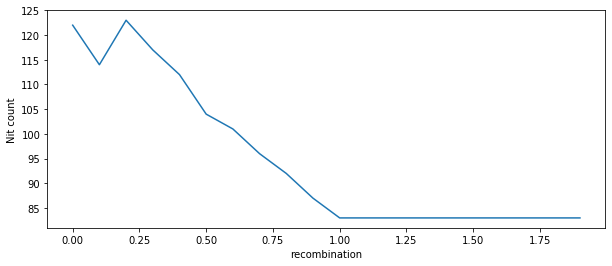

In [9]:
# параметр recombination 

recombination_nit = {}
for i in np.arange(0, 2, 0.1):
    i = round(i,1)
    result = differential_evolution(ackley, bounds, seed=42, recombination=i)
    recombination_nit[i] = result.nit
    
plt.figure(figsize=[10,4])    
df = pd.DataFrame.from_dict(recombination_nit, orient='index', columns=['Nit count']).reset_index()    
plt.xlabel('recombination')
plt.ylabel('Nit count')
plt.plot('index', 'Nit count',data=df)    

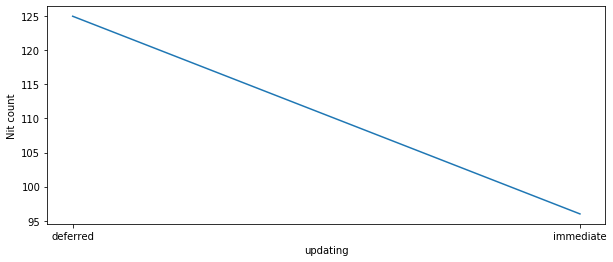

In [10]:
# параметр updating

updating_nit = {}
for i in {'immediate', 'deferred'}:
    result = differential_evolution(ackley, bounds, seed=42, updating=i)
    updating_nit[i] = result.nit
    
plt.figure(figsize=[10,4])    
df = pd.DataFrame.from_dict(updating_nit, orient='index', columns=['Nit count']).reset_index()    
plt.xlabel('updating')
plt.ylabel('Nit count')
plt.plot('index', 'Nit count',data=df)   

In [11]:
differential_evolution?

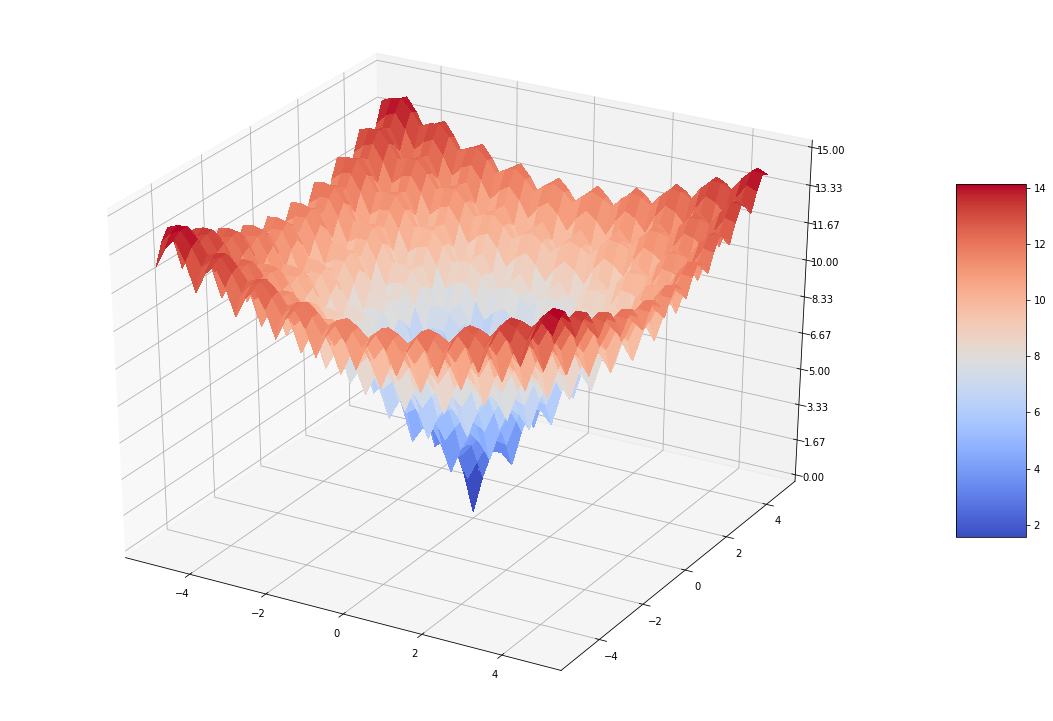

In [12]:
#построим график функции Ackley
def ackley_new(X, Y):
    arg1 = -0.2 * np.sqrt(0.5 * (X ** 2 + Y ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * X) + np.cos(2. * np.pi * Y))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

fig = plt.figure(figsize=[20,13])
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
func = ackley_new(X,Y)
Z = func

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0, 15)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

#### Допзадание

Найти множество параметров (strategy=..., maxiter=..., ..., updating=...), которые требуют минимального количества итераций.

In [13]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]
result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])